Import libraries

In [173]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt

Load files

In [174]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0],  squeeze=True, date_parser=parser) #index_col=0,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [175]:
series

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3
5,1901-06-01,168.5
6,1901-07-01,231.8
7,1901-08-01,224.5
8,1901-09-01,192.8
9,1901-10-01,122.9


In [176]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


Check for null values

In [177]:
series.isnull().sum()

Month    0
Sales    0
dtype: int64

Ordinal encode date

In [178]:
series['date_ordinal'] = series['Month'].apply(lambda x: x.toordinal())
series

,Month,Sales,date_ordinal
0,1901-01-01,266.0,693961
1,1901-02-01,145.9,693992
2,1901-03-01,183.1,694020
3,1901-04-01,119.3,694051
4,1901-05-01,180.3,694081
5,1901-06-01,168.5,694112
6,1901-07-01,231.8,694142
7,1901-08-01,224.5,694173
8,1901-09-01,192.8,694204
9,1901-10-01,122.9,694234


In [179]:
series = series.drop(['Month'], axis=1)
series

,Sales,date_ordinal
0,266.0,693961
1,145.9,693992
2,183.1,694020
3,119.3,694051
4,180.3,694081
5,168.5,694112
6,231.8,694142
7,224.5,694173
8,192.8,694204
9,122.9,694234


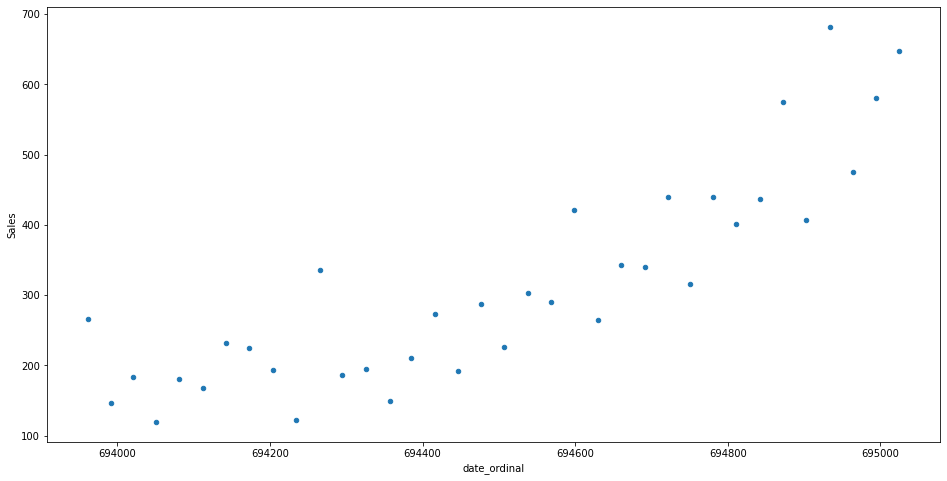

In [180]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 1, sharey=True)
series.plot(kind='scatter', x='date_ordinal', y='Sales', ax=axs, figsize=(16, 8))

Define X and y

In [181]:
X = series.date_ordinal
y = series.Sales

Normalize data

In [182]:
X = (X - X.mean()) / (X.max() - X.min())
X

0    -0.499530
1    -0.470395
2    -0.444079
3    -0.414944
4    -0.386748
5    -0.357613
6    -0.329417
7    -0.300282
8    -0.271147
9    -0.242951
10   -0.213816
11   -0.185620
12   -0.156485
13   -0.127350
14   -0.101034
15   -0.071898
16   -0.043703
17   -0.014568
18    0.013628
19    0.042763
20    0.071898
21    0.100094
22    0.129229
23    0.157425
24    0.186560
25    0.215695
26    0.242011
27    0.271147
28    0.299342
29    0.328477
30    0.356673
31    0.385808
32    0.414944
33    0.443139
34    0.472274
35    0.500470
Name: date_ordinal, dtype: float64

Split data for training and validation

In [183]:
# split into train and test sets
train_size = int(len(X) * 0.90)
X_train, X_val = X[1:train_size], X[train_size:]
y_train, y_val = y[1:train_size], y[train_size:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((31,), (31,), (4,), (4,))

Reshape

In [184]:
X_train = X_train.values.reshape(-1,1)
X_val = X_val.values.reshape(-1,1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((31, 1), (31,), (4, 1), (4,))

Define model

In [185]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, random_state=1, max_depth=5, verbose=True).fit(X_train, y_train)
y_pred = model.predict(X_val)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


array([447.0328625, 447.0328625, 447.0328625, 447.0328625])

Check error

In [186]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_pred)

28495.780908070134

In [187]:
df_val = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
32,682.0,447.032862
33,475.3,447.032862
34,581.3,447.032862
35,646.9,447.032862


Graph of predictions

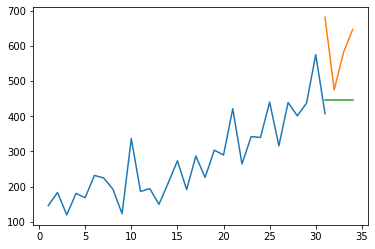

In [188]:
# plot predictions and expected results
plt.plot(y_train)
plt.plot([None for i in y_train] + [x for x in y_val])
plt.plot([None for i in y_train] + [x for x in y_pred])
plt.show()

In [189]:
final_result = pd.DataFrame({'Month': series.index[train_size:], 'Sales': y_pred})
final_result

,Month,Sales
0,32,447.032862
1,33,447.032862
2,34,447.032862
3,35,447.032862


In [190]:
final_result.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [191]:
#upload submission
submission = pd.read_csv("submission.csv")
submission

,Month,Sales
0,32,447.032862
1,33,447.032862
2,34,447.032862
3,35,447.032862
